In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Objectives
1. Be able to define and use the different components of a graph in Plotly
2. Be able to display a Plotly graph in Dash
3. Be able to make a Dash app interactive using callbacks
4. Be familiar with Heroku, an easy app hosting service with a free level

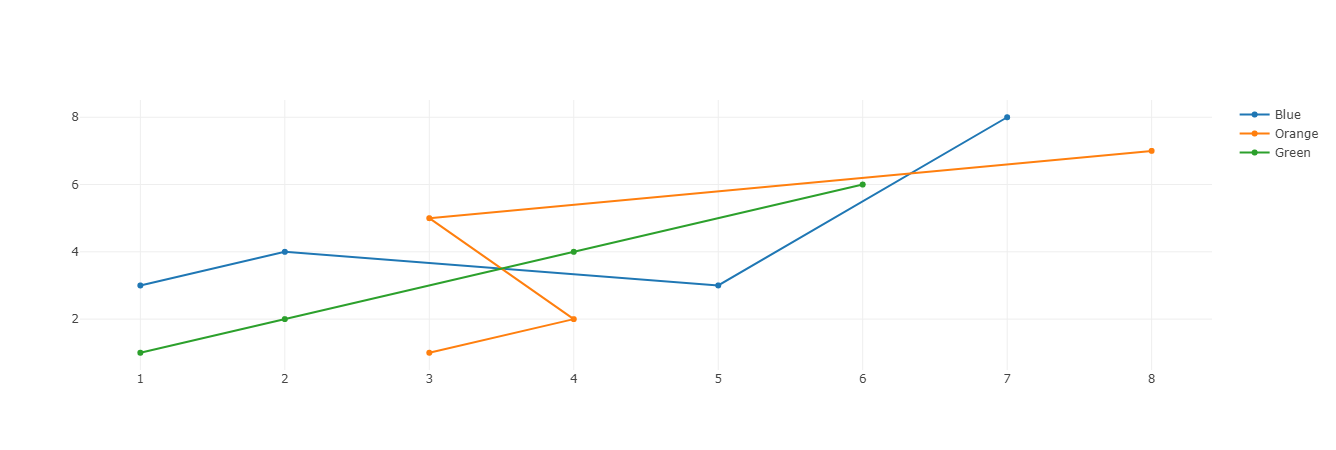

In [2]:
trace1 = go.Scatter(x=[1,2,5,7], y=[3,4,3,8], name="Blue")
trace2 = go.Scatter(x=[3,4,3,8], y=[1,2,5,7], name="Orange")
trace3 = go.Scatter(x=[1,2,4,6], y=[1,2,4,6], name="Green")
data = [trace1, trace2, trace3]
layout = go.Layout()
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [4]:
df = pd.read_csv('../data/raw/athlete_events.csv')

In [5]:
country_medals = df[["Team", "Year", "Season", "Medal"]].copy()

In [6]:
summer_country_medals = country_medals[country_medals['Season'] == "Summer"]
summer_medals_counts = summer_country_medals.groupby(['Team', 'Year', 'Medal']).size().unstack(fill_value=0).reset_index()

In [22]:
summer_medals_counts.to_csv('../data/processed/summer_medals_counts.csv')

In [7]:
usa = summer_medals_counts[summer_medals_counts['Team'] == "United States"].copy()

In [8]:
usa_last_five = usa.iloc[-5:].copy()
usa_last_five.Year = usa_last_five.Year.astype('category')

In [16]:
def fig_data(country):
    counts = summer_medals_counts[summer_medals_counts['Team'] == country].copy()
    
    trace1 = go.Bar(x=counts.Year, y=counts.Gold, name='Gold', marker=dict(color='rgb(255,215,0)'))
    trace2 = go.Bar(x=counts.Year, y=counts.Silver, name='Silver', marker=dict(color='rgb(192,192,192)'))
    trace3 = go.Bar(x=counts.Year, y=counts.Bronze, name='Bronze', marker=dict(color='rgb(205,133,63)'))

    data = [trace1, trace2, trace3]
    
    layout = go.Layout(
        barmode='stack', 
        title="Summer Olympic Medals - " + country, 
        xaxis=dict(
            type='category',
            title=dict(text='Year')
        ),
        yaxis=dict(
            title=dict(text='Count')
        )
    )
    
    return data, layout

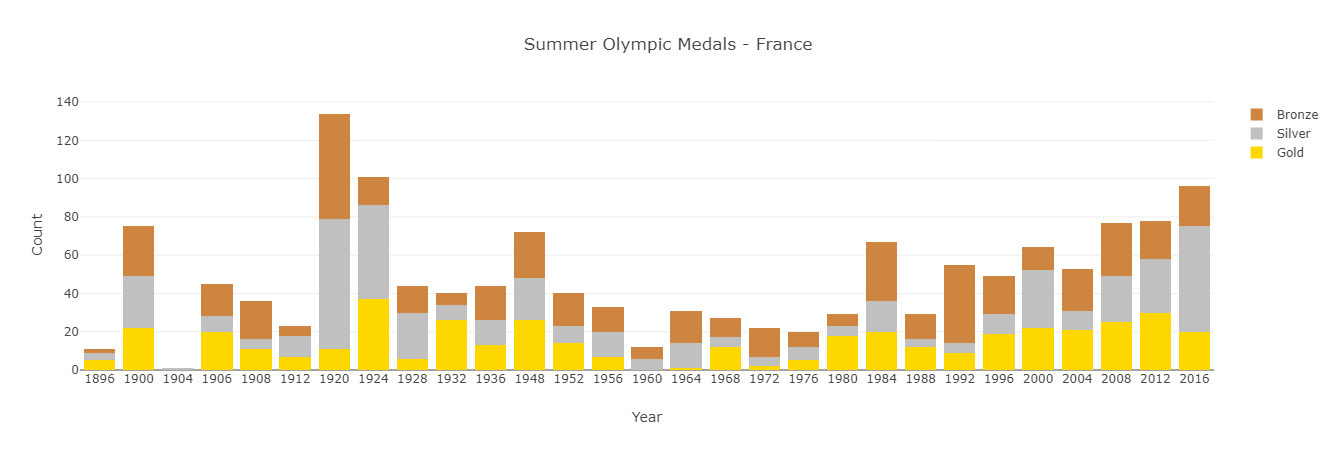

In [20]:
data, layout = fig_data("France")

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [14]:
fig

Figure({
    'data': [{'marker': {'color': 'rgb(255,215,0)'},
              'name': 'Gold',
              'type': 'bar',
              'uid': '3c9182cb-e6a4-462d-8522-73403a364f34',
              'x': array([2000, 2004, 2008, 2012, 2016]),
              'y': array([128, 115, 121, 139, 137])},
             {'marker': {'color': 'rgb(192,192,192)'},
              'name': 'Silver',
              'type': 'bar',
              'uid': 'c3558823-835c-4586-9f75-66495c3a0ec4',
              'x': array([2000, 2004, 2008, 2012, 2016]),
              'y': array([ 61,  75, 110,  55,  52])},
             {'marker': {'color': 'rgb(205,133,63)'},
              'name': 'Bronze',
              'type': 'bar',
              'uid': '37a03699-c65d-4400-8601-19333d769831',
              'x': array([2000, 2004, 2008, 2012, 2016]),
              'y': array([51, 69, 78, 44, 67])}],
    'layout': {'barmode': 'stack',
               'title': {'text': 'Summer Olympic Medals - USA'},
               'xaxis': {'title':